In [1]:
import os
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation

from meld_graph.dataset import GraphDataset
from meld_classifier.meld_cohort import MeldCohort, MeldSubject

from meld_graph.evaluation import Evaluator
from meld_graph.evaluation import load_prediction
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns




Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350


In [2]:
save_dir = '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-00-01_TEST_plot_saliencies'


In [3]:
# load experiment
model_path = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-18_IFYF_object_save_final/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_path)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "trainval"
# subjects = exp.data_parameters["train_ids"] + exp.data_parameters["val_ids"]
# subjects = subjects[0:2]
subjects= [
        # 'MELD_H14_3T_FCD_0019', 
           'MELD_H14_3T_FCD_0017',
        #    'MELD_H23_15T_FCD_0007',
           ]

features = exp.data_parameters["features"]
cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )
dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
    
# create evaluator
eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_path,
    make_images=False,
    dataset=dataset,
    cohort=cohort,
    save_dir=save_dir,
    subject_ids=subjects,
    mode="test",
)


Initialised Experiment 23-08-18_IFYF_object_save_final/s_0


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0017
Evalution test, sigmoid
Creating model
Creating ensemble model
Loading ensemble model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-18_IFYF_object_save_final/s_0/fold_all/ensemble_model.pt


In [4]:
# calculate saliencies
saliencies = eva.calculate_saliency()

calculating saliency
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0019
calculating saliency for MELD_H14_3T_FCD_0019, cluster 1.0
/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/captum/attr/_utils/batching.py:45: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 163842 equal to the number of examples.
  warnings.warn(
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0017
calculating saliency for MELD_H14_3T_FCD_0017, cluster 1.0
Loading and preprocessing test data
Z-scoring data for MELD_H23_15T_FCD_0007
calculating saliency for MELD_H23_15T_FCD_0007, cluster 1.0
calculating saliency for MELD_H23_15T_FCD_0007, cluster 2.0


In [4]:
# load saliencies from csv
import pandas as pd
csv_file = os.path.join(eva.save_dir, 'results', f'saliency.csv')
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,MELD_H14_3T_FCD_0019,1.0,mean,-5.789855e-06,0.000009,3.394065e-06,-1.548667e-07,1.112843e-06,1.527345e-06,0.000000,...,1.562668e-05,2.448466e-05,0.000008,-6.800757e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,MELD_H14_3T_FCD_0019,1.0,std,1.948955e-05,0.000023,2.305669e-05,1.364065e-05,2.343521e-05,1.191456e-05,0.000000,...,3.819227e-05,6.177604e-05,0.000021,1.493512e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MELD_H14_3T_FCD_0017,1.0,mean,-1.069488e-05,0.000008,8.426571e-06,-1.678184e-05,8.685643e-06,8.366513e-07,0.000010,...,8.220305e-06,2.409806e-05,0.000006,3.715557e-06,0.000009,0.000024,0.000017,0.000002,-0.000006,-0.000006
3,MELD_H14_3T_FCD_0017,1.0,std,5.185029e-05,0.000052,4.396738e-05,4.177854e-05,3.317905e-05,3.646866e-05,0.000029,...,3.167909e-05,5.453896e-05,0.000045,3.638335e-05,0.000026,0.000043,0.000037,0.000021,0.000029,0.000028
4,MELD_H23_15T_FCD_0007,1.0,mean,-4.945094e-07,0.000001,3.958841e-08,-1.886637e-06,3.635468e-07,-1.376565e-06,0.000000,...,-7.196793e-07,-5.331677e-07,0.000001,-3.627707e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# rename columns
column_mapping={
    'Unnamed: 0': 'ID'	,
    'Unnamed: 1': 'cluster_num',
    'Unnamed: 2': 'mean_std',
}
for i, feature in enumerate(features):
    column_mapping[f'{i}']=feature

df.rename(columns=column_mapping, inplace=True)
df.head()

,ID,cluster_num,mean_std,.combat.on_lh.pial.K_filtered.sm20.mgh,.combat.on_lh.thickness.sm3.mgh,.combat.on_lh.thickness_regression.sm3.mgh,.combat.on_lh.w-g.pct.sm3.mgh,.combat.on_lh.sulc.sm3.mgh,.combat.on_lh.curv.sm3.mgh,.combat.on_lh.gm_FLAIR_0.75.sm3.mgh,...,.inter_z.asym.intra_z.combat.on_lh.thickness_regression.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.sulc.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.curv.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm3.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm3.mgh
0,MELD_H14_3T_FCD_0019,1.0,mean,-5.789855e-06,0.000009,3.394065e-06,-1.548667e-07,1.112843e-06,1.527345e-06,0.000000,...,1.562668e-05,2.448466e-05,0.000008,-6.800757e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,MELD_H14_3T_FCD_0019,1.0,std,1.948955e-05,0.000023,2.305669e-05,1.364065e-05,2.343521e-05,1.191456e-05,0.000000,...,3.819227e-05,6.177604e-05,0.000021,1.493512e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MELD_H14_3T_FCD_0017,1.0,mean,-1.069488e-05,0.000008,8.426571e-06,-1.678184e-05,8.685643e-06,8.366513e-07,0.000010,...,8.220305e-06,2.409806e-05,0.000006,3.715557e-06,0.000009,0.000024,0.000017,0.000002,-0.000006,-0.000006
3,MELD_H14_3T_FCD_0017,1.0,std,5.185029e-05,0.000052,4.396738e-05,4.177854e-05,3.317905e-05,3.646866e-05,0.000029,...,3.167909e-05,5.453896e-05,0.000045,3.638335e-05,0.000026,0.000043,0.000037,0.000021,0.000029,0.000028
4,MELD_H23_15T_FCD_0007,1.0,mean,-4.945094e-07,0.000001,3.958841e-08,-1.886637e-06,3.635468e-07,-1.376565e-06,0.000000,...,-7.196793e-07,-5.331677e-07,0.000001,-3.627707e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
base_feature_set = [
        ".on_lh.gm_FLAIR_0.5.sm3.mgh",
        ".on_lh.wm_FLAIR_1.sm3.mgh",
        ".on_lh.curv.sm3.mgh",
        ".on_lh.pial.K_filtered.sm20.mgh",
        ".on_lh.sulc.sm3.mgh",
        ".on_lh.thickness_regression.sm3.mgh",
        ".on_lh.w-g.pct.sm3.mgh",
    ]

feature_names_set = [
        "GM FLAIR (50%)",
        "WM FLAIR (1mm)",
        "Mean curvature",
        "Intrinsic Curvature",
        "Sulcal depth",
        "Cortical thickness regressed",
        "Grey-white contrast",
    ]


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0019


1


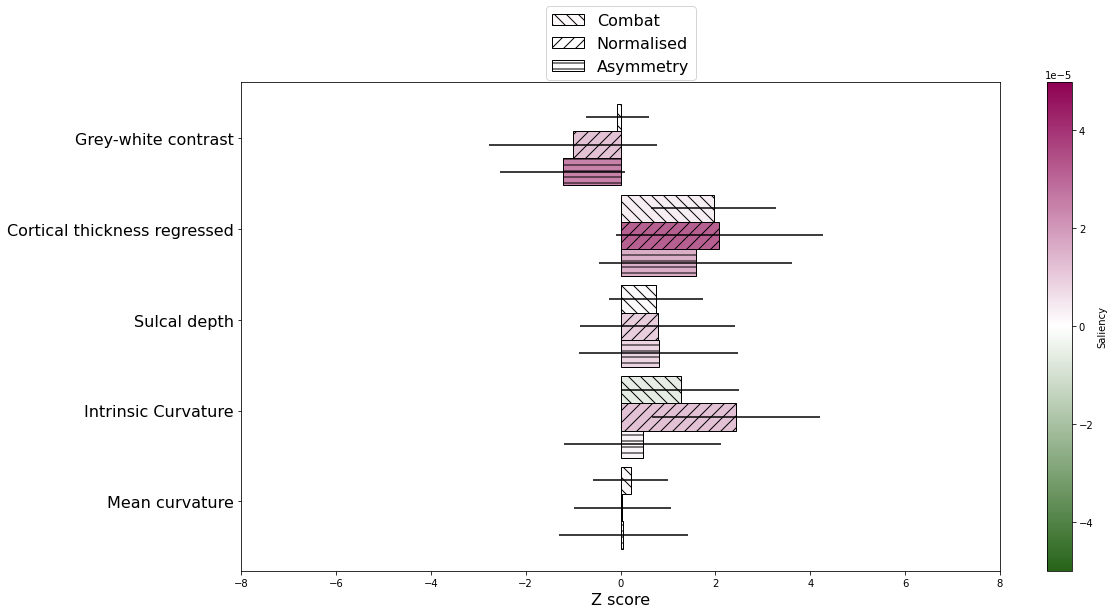

In [62]:
import matplotlib as mpl
import matplotlib.cm as cm

hdf_predictions=os.path.join(eva.save_dir, 'results','predictions.hdf5')

subject_id = 'MELD_H14_3T_FCD_0019'

subdf = df[df['ID']==subject_id]

#load data for that subject
data_dictionary = eva.load_data_from_file(subject_id, keys=['cluster_thresholded','input_features'], split_hemis=False, save_prediction_suffix="")
features_vals = data_dictionary['input_features']
predictions = data_dictionary['cluster_thresholded']

#check if subject has FLAIR
if subdf['.combat.on_lh.gm_FLAIR_0.5.sm3.mgh'].sum()>0:
    base_features = base_feature_set
    feature_names = feature_names_set
else:
    base_features = base_feature_set[2:]
    feature_names = feature_names_set[2:]

#find number of clusters
list_clust = set(subdf['cluster_num'])
print(len(list_clust))


#initiate params for saliencies
prefixes = [".combat", ".inter_z.intra_z.combat", ".inter_z.asym.intra_z.combat"]
names = ["combat", "norm", "asym"]
# lims = np.max([1e-9, 1e-9])
lims = 5e-5
norm = mpl.colors.Normalize(vmin=-lims, vmax=lims)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "grpr",
    colors=[
        "#276419",
        "#FFFFFF",
        "#8E0152",
    ],
)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
labels = ["Combat", "Normalised", "Asymmetry"]
hatching = ["\\\\", "//", "--"]


# loop over clusters
for cluster in list_clust:
    fig2 = plt.figure(figsize=(17, 9))
    ax2 = fig2.add_subplot()
    # get and plot saliencies
    for pr, prefix in enumerate(prefixes):
        cur_data = np.zeros(len(base_features))
        cur_err = np.zeros(len(base_features))
        saliency_data = np.zeros(len(base_features))
        for b, bf in enumerate(base_features):
            cur_data[b] = np.mean(
                            features_vals[np.array([predictions == cluster])[0], features.index(prefix + bf)]
                        )
            cur_err[b] = np.std(
                            features_vals[np.array([predictions == cluster])[0], features.index(prefix + bf)]
                        )
            saliency_data[b] = subdf[subdf['mean_std']=='mean'][prefix + bf].values[0] 
        
        ax2.barh(
            y=np.array(range(len(base_features))) - pr * 0.3,
            width=cur_data,
            hatch=hatching[pr],
            height=0.3,
            edgecolor="k",
            xerr=cur_err,
            label=labels[pr],
            color=m.to_rgba(saliency_data),
        )
    ax2.set_xlim([-8, 8])
    # ax2.set_xticks([])
    ax2.set_yticks(np.array(range(len(base_features))) - 0.23)
    ax2.set_yticklabels(feature_names, fontsize=16)
    ax2.set_xlabel("Z score", fontsize=16)
    ax2.legend(loc="upper center", bbox_to_anchor=(0.5, 1.17), fontsize=16)
    fig2.colorbar(m, label=f"Saliency", ax=ax2, )
    ax2.set_autoscale_on(True)

### plot saliencies vertices

In [64]:
saliencies = eva.calculate_saliency()

calculating saliency
Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0017
calculating saliency for MELD_H14_3T_FCD_0017, cluster 1.0
/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/captum/attr/_utils/batching.py:45: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 163842 equal to the number of examples.
  warnings.warn(


In [63]:
feat_ind = features.index('.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm3.mgh')
overlay = saliencies[subject_id][1.0][:,feat_ind]
overlay

KeyError: 'MELD_H14_3T_FCD_0019'

In [43]:
print(f'min saliencies={overlay.min()}')
print(f'max saliencies={overlay.max()}')
print(f'mean saliencies={overlay.mean()}')
print(f'std saliencies={overlay.std()}')

min saliencies=-0.00031738052899875184
max saliencies=0.0005780468148899005
mean saliencies=1.207340710262565e-06
std saliencies=1.335920580342493e-05


In [47]:
# prediction 
data = eva.load_data_from_file(subject_id, keys=['cluster_thresholded','input_labels'], split_hemis=True, save_prediction_suffix="")
# mask_hemis = cohort.split_hemispheres(predictions)
# mask = (mask_hemis['left']==1).astype(bool)
# mask.sum()


Loading and preprocessing test data
Z-scoring data for MELD_H14_3T_FCD_0017


In [59]:
hemi='left'
predictions = data['cluster_thresholded'][hemi]
mask= (predictions==1)
labels = data['input_labels'][hemi].numpy()

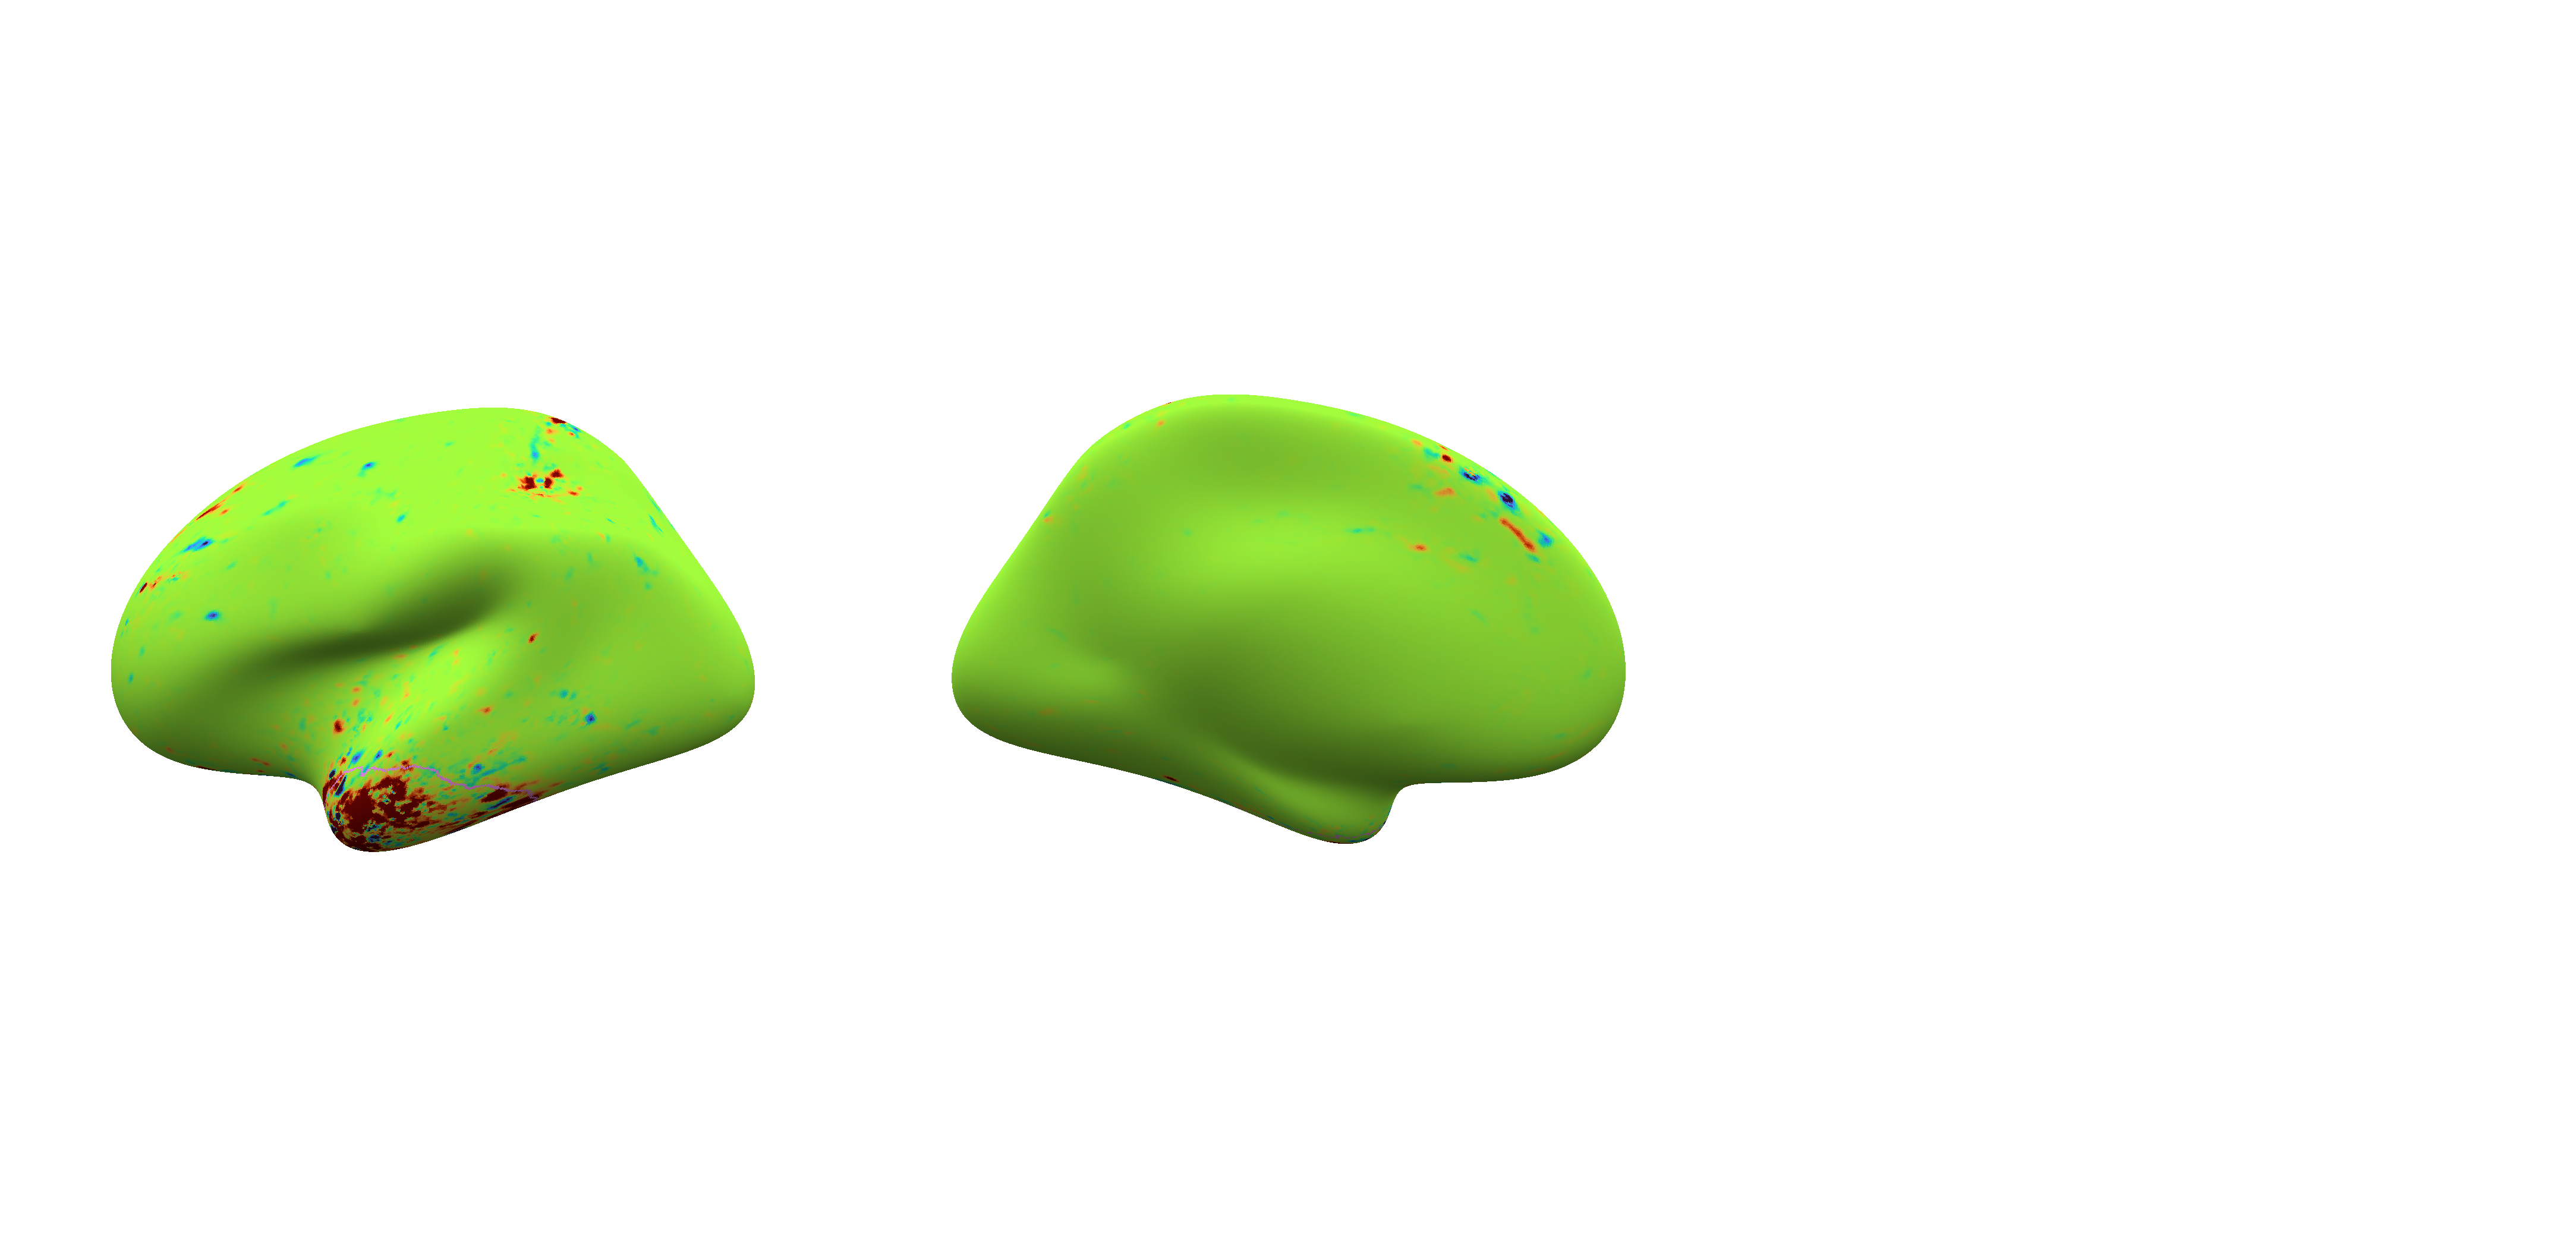

In [61]:
import matplotlib_surface_plotting as msp
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'],overlay,
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5, parcel = mask,
    )